### 背景
- 资源集中化的搜索引擎：Archie、Veronica、Jughead、Gopher
- 资源关联的搜索引擎：Yaho、LookSmart、Dmoz
- 如今:Google创始人larry page提出的 pagerank,针对网页排名，计算网页重要性，优化搜索引擎排序 

### 中心思想
- 数量假设：一个网页受到其他网页入链越多，说明该网页越重要 
- 质量假设：一个pr值高的网页指向的网页，说明被指向的网页重要

公式: $P R(a)_{i+1}=\sum_{i=0}^{n} \frac{P R(T i)_{i}}{L(T i)}$

$ P R(T i)$ 表示a的入链节点（指向a）的pr值

$L(T i)$ 表示a的入链节点的出链数

$i$ 表示循环次数,$i=0$时会初始化节点pr值，一般为1/网页数量,循环100次得到稳定值

### 矩阵化表达
- 迭代求解需要关注每个节点值的变化
- 使用转移概率矩阵即马尔可夫矩阵可通过矩阵乘法快速求解
- 转化方式例如：a,b,c,d四个节点，矩阵为列到行 也就是该节点到对应节点的转移概率，也就是说列a到行b，如果a指向b和c，那么a到b,a到c的概率都为1/2
- 转移矩阵列和为1，因为都是表述的列节点到行节点的概率

 <img align="left"  src="picture/pagerank/L8-W8qCMHoYBqNDYvaXCKz4sfdzO8zNyQeXvVYJ_B6U.original.fullsize.png" width = "300" height = "200" style="float left" />

$\mathbf{P R}(\mathrm{a})=\mathrm{M}^{*} \mathbf{V}$

a为列节点，M 为上述转移矩阵,V为上轮迭代的Pr值



<img align="left"  src="picture/pagerank/u5GMHyxlbup0Mm63Zf_Ps5dqs43_7GVXY_TjUAyO-1I.original.fullsize.png" width = "600" height = "400" />

### Dead Ends问题
<img align='left' width = "500" height = "300" src="picture/pagerank/O4EJUhadHTjnbbokcofIy2TZ1IB4j057CQTM53UPrbg.original.fullsize.png" />

<img align ='left' width='500' height='300' src="picture/pagerank/nbJBCgtJr_AHRLGOX51RXlyDBE2Rf-FaWQcy_vl86Gw.original.fullsize.png" />

### 解决方法 Teleport

<img align='left' width='500' height='300' src="picture/pagerank/9YMGkXdQHgmM508Y2zeV5mCP8fVtBsXHuLuxIfTif3I.original.fullsize.png" />

<img align='left' width='500' height='300'  src="picture/pagerank/6k62w_L3CH7hSqdGMB2vJdg0EEgJTEq7WT5iGSdiaBM.original.fullsize.png" />

这里e应该是个常数1，e/n是个常数，不然3 * 3 x 3 * 1 =3*1

### Spider Traps 问题
循环多次之后 自环的节点pr会归为1

<img align='left' width='500' height='300' src="picture/pagerank/2QQL3Yu2vAkSFwJNsbtJMEF1AKiFj-MdPv_9dLf73Rw.original.fullsize.png" />

<img align='left' width='500' height='300' src="picture/pagerank/R9guo3rOvrcXuTftivP19XwcO0KFCFF9fYloz44Efx0.original.fullsize.png" />

### 解决方法Random Teleport

<img align='left' width='500' height='300' src="picture/pagerank/C3uprLktcNcIwezE3w_ES_aQ-nKrj1iRvBeciC7QffU.original.fullsize.png" />

这个beta有点像epslion greedy 的感觉，一般设置为0.8～0.9之间

<img align='left' width='500' height='300' src="picture/pagerank/WVgCe_Y_MO5QTeC9SfvVu-4cuSfimUcS8de3Ct_R5jc.original.fullsize.png" />

<img align='left' width='500' height='300' src="picture/pagerank/VEii9USwVBJ6UFN4w2MvEBQV9y6Nb0ZR7Gmo7tQC150.original.fullsize.png" />

这里结尾的值加错了，不过无伤大雅

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [23]:
Graph  = nx.DiGraph()
Graph.add_nodes_from(range(0,100))

In [24]:
for i in range(300):
    j = np.random.randint(0,100)
    k = np.random.randint(0,100)
    Graph.add_edge(k,j)

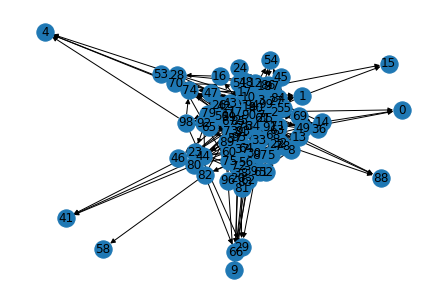

In [25]:
nx.draw(Graph,with_labels=True)

In [26]:
pr = nx.pagerank(Graph,max_iter=100,alpha=0.01)
pr

{0: 0.009978435284920635,
 1: 0.010036455197619048,
 2: 0.010035160951587303,
 3: 0.009956786673809524,
 4: 0.010010674007142856,
 5: 0.010023413201587303,
 6: 0.009957036673809525,
 7: 0.0100324423484127,
 8: 0.009969649590476191,
 9: 0.010056500721428573,
 10: 0.009965556396031746,
 11: 0.010047354554761906,
 12: 0.009921174939115646,
 13: 0.009957120007142857,
 14: 0.010089559868253968,
 15: 0.009956899173809524,
 16: 0.009993470673809523,
 17: 0.01005154484047619,
 18: 0.010007176435714287,
 19: 0.010061576784920635,
 20: 0.009931804888095239,
 21: 0.009960193292857144,
 22: 0.00994374003888889,
 23: 0.010039904530952382,
 24: 0.009973981673809525,
 25: 0.009978001951587302,
 26: 0.009981980562698414,
 27: 0.010136147161337868,
 28: 0.009990104451587302,
 29: 0.009980167292857145,
 30: 0.010201256983333334,
 31: 0.009965817507142857,
 32: 0.00994010834047619,
 33: 0.009977920007142857,
 34: 0.010054112716893424,
 35: 0.009991147153401362,
 36: 0.010002945840476191,
 37: 0.009954448

In [27]:
sorted(pr.items(),key=lambda x:x[1],reverse=True)

[(30, 0.010201256983333334),
 (66, 0.010199422705555555),
 (40, 0.01018828747086168),
 (73, 0.010183305261111114),
 (48, 0.01014646411825397),
 (27, 0.010136147161337868),
 (74, 0.010110396784920636),
 (49, 0.010102284602380954),
 (14, 0.010089559868253968),
 (72, 0.01007408500714286),
 (91, 0.01007235884047619),
 (63, 0.010061991443650794),
 (19, 0.010061576784920635),
 (89, 0.010057265007142857),
 (9, 0.010056500721428573),
 (34, 0.010054112716893424),
 (83, 0.010052651705555556),
 (17, 0.01005154484047619),
 (84, 0.010047897411904762),
 (11, 0.010047354554761906),
 (94, 0.010046536673809524),
 (39, 0.01004080234047619),
 (23, 0.010039904530952382),
 (1, 0.010036455197619048),
 (65, 0.010036324642063492),
 (45, 0.01003537484047619),
 (2, 0.010035160951587303),
 (7, 0.0100324423484127),
 (70, 0.010031005840476191),
 (86, 0.01002660234047619),
 (5, 0.010023413201587303),
 (55, 0.010018427062698412),
 (4, 0.010010674007142856),
 (51, 0.01001031249920635),
 (59, 0.010007195086507936),
 (

### 总结
- 转移矩阵对角为1 spider traps问题
- 转移矩阵 列和为0 dead ends问题
- 仅仅用beta解决不了 dead ends 问题，因为不满足列和为1

<img align='left' width='500' height='300' src="picture/pagerank/PI9bmRq3-Z3njauWl9FxfFw_hZdVDrlFUVMP1VU3DnM.original.fullsize.png" />




优点：
- 通过网页间链接决定网页重要性，一定程度消除了人为对排序结果的影响
- 离线计算好pr值，并非查找时计算，提升了效率

缺点：
- 存在时间旧的网站，pr值会越来越大，而新生网站pr增长慢
- 非查询相关的特性，查询结果会偏离搜索内容
- 通过僵尸网站或链接，人为刷pr值

中间蓝色为僵尸网站，右边为正常网站，在正常网站上给僵尸网站打广告，链接写在评论区之类的，一堆僵尸网站又链接到目标网站，从而提升目标网站pr
<img align='left' width='500' height='300' src="picture/pagerank/DCLGzXiihEmKYpbe8F3R2Z4bQlCZcLSq6am0UNkymPk.original.fullsize.png" />

## 幂法

---
PageRank的计算方法包括迭代算法、幂法、代数算法。

在实际应用中许多数据都以图(graph)的形式存在，比如，互联网、社交网络都可以看作是一个图。图数据上的机器学习具有理论与应用上的重要意义。pageRank算法是图的链接分析 (link analysis)的代表性算法，属于图数据上的无监督学习方法。  

pageRank算法最初作为互联网网页重要度的计算方法，1996年由page和Brin提出，并用于谷歌搜索引擎的网页排序。事实上，pageRank可以定义在任意有向图上，后来被应用到社会影响力分析、文本摘要等多个问题。  

pageRank算法的基本想法是在有向图上定义一个随机游走模型，即一阶马尔可夫链，描述随机游走者沿着有向图随机访问各个结点的行为。在一定条件下，极限情况访问每个结点的概率收敛到平稳分布， 这时各个结点的平稳概率值就是其 pageRank值，表示结点的重要度。 pageRank是递归定义的，pageRank的计算可以通过迭代算法进行。

In [28]:
#https://gist.github.com/diogojc/1338222/84d767a68da711a154778fb1d00e772d65322187

import numpy as np
from scipy.sparse import csc_matrix


def pageRank(G, s=.85, maxerr=.0001):
    """
    Computes the pagerank for each of the n states
    Parameters
    ----------
    G: matrix representing state transitions
       Gij is a binary value representing a transition from state i to j.
    s: probability of following a transition. 1-s probability of teleporting
       to another state.
    maxerr: if the sum of pageranks between iterations is bellow this we will
            have converged.
    """
    n = G.shape[0]

    # transform G into markov matrix A
    A = csc_matrix(G, dtype=np.float)
    rsums = np.array(A.sum(1))[:, 0]
    ri, ci = A.nonzero()
    A.data /= rsums[ri]

    # bool array of sink states
    sink = rsums == 0

    # Compute pagerank r until we converge
    ro, r = np.zeros(n), np.ones(n)
    while np.sum(np.abs(r - ro)) > maxerr:
        ro = r.copy()
        # calculate each pagerank at a time
        for i in range(0, n):
            # inlinks of state i
            Ai = np.array(A[:, i].todense())[:, 0]
            # account for sink states
            Di = sink / float(n)
            # account for teleportation to state i
            Ei = np.ones(n) / float(n)

            r[i] = ro.dot(Ai * s + Di * s + Ei * (1 - s))

    # return normalized pagerank
    return r / float(sum(r))

In [29]:
# Example extracted from 'Introduction to Information Retrieval'
G = np.array([[0,0,1,0,0,0,0],
              [0,1,1,0,0,0,0],
              [1,0,1,1,0,0,0],
              [0,0,0,1,1,0,0],
              [0,0,0,0,0,0,1],
              [0,0,0,0,0,1,1],
              [0,0,0,1,1,0,1]])
print(pageRank(G,s=.86))

[0.12727557 0.03616954 0.12221594 0.22608452 0.28934412 0.03616954
 0.16274076]


In [31]:
for i in csc_matrix(G, dtype=np.float):
    print(i)

  (0, 2)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 0)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 6)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 6)	1.0


In [32]:
csc_matrix(G, dtype=np.float).sum(1)

matrix([[1.],
        [2.],
        [3.],
        [2.],
        [1.],
        [2.],
        [3.]])

In [41]:
np.array(csc_matrix(G, dtype=np.float).sum(1))[:,0]

array([1., 2., 3., 2., 1., 2., 3.])

In [46]:
csc_matrix(G, dtype=np.float).nonzero()

(array([0, 1, 1, 2, 2, 2, 3, 3, 4, 5, 5, 6, 6, 6], dtype=int32),
 array([2, 1, 2, 0, 2, 3, 3, 4, 6, 5, 6, 3, 4, 6], dtype=int32))

## 迭代法

In [45]:
import numpy as np
p = 0.85    #引入浏览当前网页的概率为p,假设p=0.85
 
a = np.array([[1,0,0,0],
              [0,0,0,0],
              [0,0,0,1],
              [0,0.5,0.5,0]],dtype = float)  #dtype指定为float
length=a.shape[1]  #网页数量
#构造转移矩阵
b = np.transpose(a)  #b为a的转置矩阵
m = np.zeros((a.shape),dtype = float)
for j in range(b.shape[1]):
    #如果一个节点没有任何出链，Dead Ends
    if b[:,j].sum()==0:
        b[:,j]=b[:,j]+np.array([1/length]*length)    #完成初始化分配
m = b

v = np.zeros((m.shape[0],1),dtype = float)  #构造一个存放pr值得矩阵
v = v + float(1)/m.shape[0]   #pr值初始化

count=0
ee=np.array([[1/length]*length]).reshape(length,-1)
# 循环100次计算pageRank值
for i in range(100):
    #  解决spider traps问题，spider traps会导致网站权重向一个节点偏移，将转移矩阵加上打开其他网页的概率1-p
    v = p*np.dot(m,v) + (1-p)*ee   # 广播
    count+=1
    print("第{}次迭代".format(count))
    
print(v)

第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
第20次迭代
第21次迭代
第22次迭代
第23次迭代
第24次迭代
第25次迭代
第26次迭代
第27次迭代
第28次迭代
第29次迭代
第30次迭代
第31次迭代
第32次迭代
第33次迭代
第34次迭代
第35次迭代
第36次迭代
第37次迭代
第38次迭代
第39次迭代
第40次迭代
第41次迭代
第42次迭代
第43次迭代
第44次迭代
第45次迭代
第46次迭代
第47次迭代
第48次迭代
第49次迭代
第50次迭代
第51次迭代
第52次迭代
第53次迭代
第54次迭代
第55次迭代
第56次迭代
第57次迭代
第58次迭代
第59次迭代
第60次迭代
第61次迭代
第62次迭代
第63次迭代
第64次迭代
第65次迭代
第66次迭代
第67次迭代
第68次迭代
第69次迭代
第70次迭代
第71次迭代
第72次迭代
第73次迭代
第74次迭代
第75次迭代
第76次迭代
第77次迭代
第78次迭代
第79次迭代
第80次迭代
第81次迭代
第82次迭代
第83次迭代
第84次迭代
第85次迭代
第86次迭代
第87次迭代
第88次迭代
第89次迭代
第90次迭代
第91次迭代
第92次迭代
第93次迭代
第94次迭代
第95次迭代
第96次迭代
第97次迭代
第98次迭代
第99次迭代
第100次迭代
[[0.47534884]
 [0.15906977]
 [0.15906977]
 [0.20651163]]


In [36]:
ee

array([[0.25],
       [0.25],
       [0.25],
       [0.25]])

In [37]:
m

array([[1.  , 0.25, 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.5 ],
       [0.  , 0.25, 0.  , 0.5 ],
       [0.  , 0.25, 1.  , 0.  ]])

In [40]:
import numpy as np
p = 0.85    #引入浏览当前网页的概率为p,假设p=0.8
 
a = np.array([[1,0,0,0],
              [0,0,0,0],
              [0,0,0,1],
              [0,0.5,0.5,0]],dtype = float)  #dtype指定为float
length=a.shape[1]  #网页数量
#构造转移矩阵
b = np.transpose(a)  #b为a的转置矩阵
m = np.zeros((a.shape),dtype = float)

print('a',a)
print('length',length)
print('b',b)
print('m',m)

a [[1.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  1. ]
 [0.  0.5 0.5 0. ]]
length 4
b [[1.  0.  0.  0. ]
 [0.  0.  0.  0.5]
 [0.  0.  0.  0.5]
 [0.  0.  1.  0. ]]
m [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [41]:
np.dot(a,b)

array([[1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0.5]])

In [43]:
v = np.zeros((4,1))+1/3
v

array([[0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333]])

In [44]:
np.dot(a,v)

array([[0.33333333],
       [0.        ],
       [0.33333333],
       [0.33333333]])